<a href="https://colab.research.google.com/github/suhanitatiya/grape-leaf-detecetion/blob/main/trainingdatadets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon May  8 10:18:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
import os
import cv2
import keras

In [ ]:

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Grapes_Disease Detection/Grapes_Disease Detection",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    )


Found 4062 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy']

In [ ]:
'''
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
'''

'\nplt.figure(figsize=(10,10))\nfor image_batch , label_batch in dataset.take(1):\n    for i in range(12):\n        ax = plt.subplot(3,4,i+1)\n        plt.imshow(image_batch[i].numpy().astype("uint8"))\n        plt.title(class_names[label_batch[i]])\n        plt.axis("off") \n'

In [ ]:
train_size = 0.8
len(dataset)*train_size

101.60000000000001

In [ ]:
len(dataset)

127

In [ ]:
train_ds = dataset.take(101)
len(train_ds)

101

In [ ]:
test_ds = dataset.skip(101)
len(test_ds)

26

In [ ]:
val_size = 0.1
len(dataset)*val_size

12.700000000000001

In [ ]:
val_ds = test_ds.take(12)
len(val_ds)

12

In [ ]:

test_ds = test_ds.skip(12)
len(test_ds)

14

In [ ]:
def get_dataset_partitions_tf(ds ,train_split = 0.8 , val_split = 0.1 , test_split = 0.1, shuffle = True , shuffle_size = 10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size , seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds , val_ds , test_ds

In [ ]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(val_ds)

12

In [ ]:
len(test_ds)

14

In [ ]:

len(train_ds)

101

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
#pip install -U pip

In [ ]:
#pip install tensorflow-gpu==2.8.3

In [ ]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE , IMAGE_SIZE , IMAGE_SIZE , CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation ='relu', input_shape = input_shape) ,
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu') ,
    layers.MaxPooling2D((2,2)) ,
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu') ,
    layers.MaxPooling2D((2,2)) ,
    layers.Conv2D(64,(3,3),activation ='relu') ,
    layers.MaxPooling2D((2,2)) ,
    layers.Conv2D(64,(3,3),activation ='relu') ,
    layers.MaxPooling2D((2,2)) ,
    layers.Conv2D(64,(3,3),activation ='relu') ,
    layers.MaxPooling2D((2,2)) ,
    layers.Flatten() ,
    layers.Dense(64, activation ='relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False) ,
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 50,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)


Epoch 1/50
101/101 [==============================] - 1280s 2s/step - loss: 1.0614 - accuracy: 0.5037 - val_loss: 1.4247 - val_accuracy: 0.4427
Epoch 2/50
101/101 [==============================] - 6s 63ms/step - loss: 0.7952 - accuracy: 0.6408 - val_loss: 1.2278 - val_accuracy: 0.5885
Epoch 3/50
101/101 [==============================] - 6s 60ms/step - loss: 0.5509 - accuracy: 0.7800 - val_loss: 0.5492 - val_accuracy: 0.8177
Epoch 4/50
101/101 [==============================] - 6s 61ms/step - loss: 0.3874 - accuracy: 0.8577 - val_loss: 1.3574 - val_accuracy: 0.6328
Epoch 5/50
101/101 [==============================] - 6s 60ms/step - loss: 0.2936 - accuracy: 0.8858 - val_loss: 1.0349 - val_accuracy: 0.7188
Epoch 6/50
101/101 [==============================] - 6s 60ms/step - loss: 0.2160 - accuracy: 0.9217 - val_loss: 0.6518 - val_accuracy: 0.7865
Epoch 7/50
101/101 [==============================] - 6s 61ms/step - loss: 0.2273 - accuracy: 0.9183 - val_loss: 0.2932 - val_accuracy: 0.885

In [ ]:
scores = model.evaluate(test_ds)

14/14 [==============================] - 8s 25ms/step - loss: 0.4009 - accuracy: 0.8951


In [ ]:
scores

[0.12351638823747635, 0.9642857313156128]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 101}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

**We have to later perform/train data for 50 EPOCHS.**
**After that only below code is executable**

Text(0.5, 1.0, 'Training and Validation Loss')

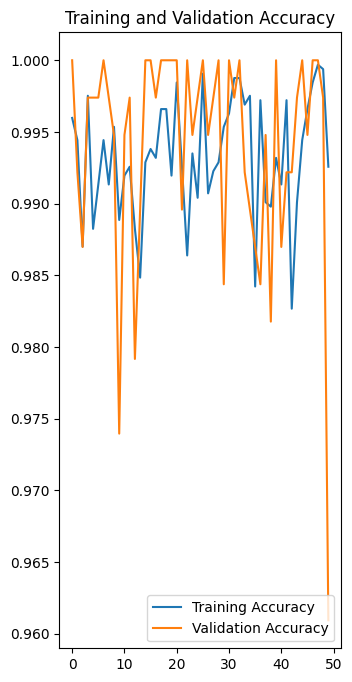

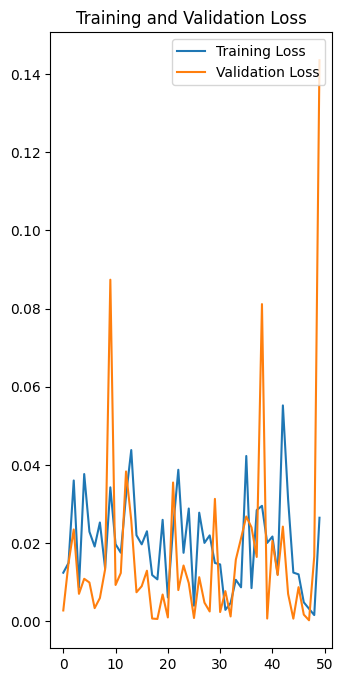

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1 ,2 ,1 )
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1 ,2 ,1 )
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First image to predict
First image actual label:  Grape___Esca_(Black_Measles)
1/1 [==============================] - 0s 164ms/step
Predicted label Grape___Esca_(Black_Measles)


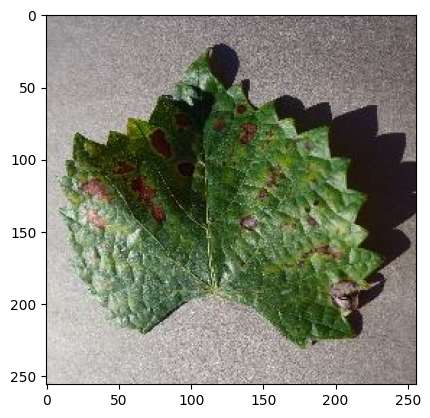

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("First image actual label: ", class_names[first_label])


  batch_prediction = model.predict(images_batch)

  print("Predicted label" , class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array , 0)  #creates a batch

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])),2)
  return predicted_class , confidence


1/1 [==============================] - 0s 22ms/step


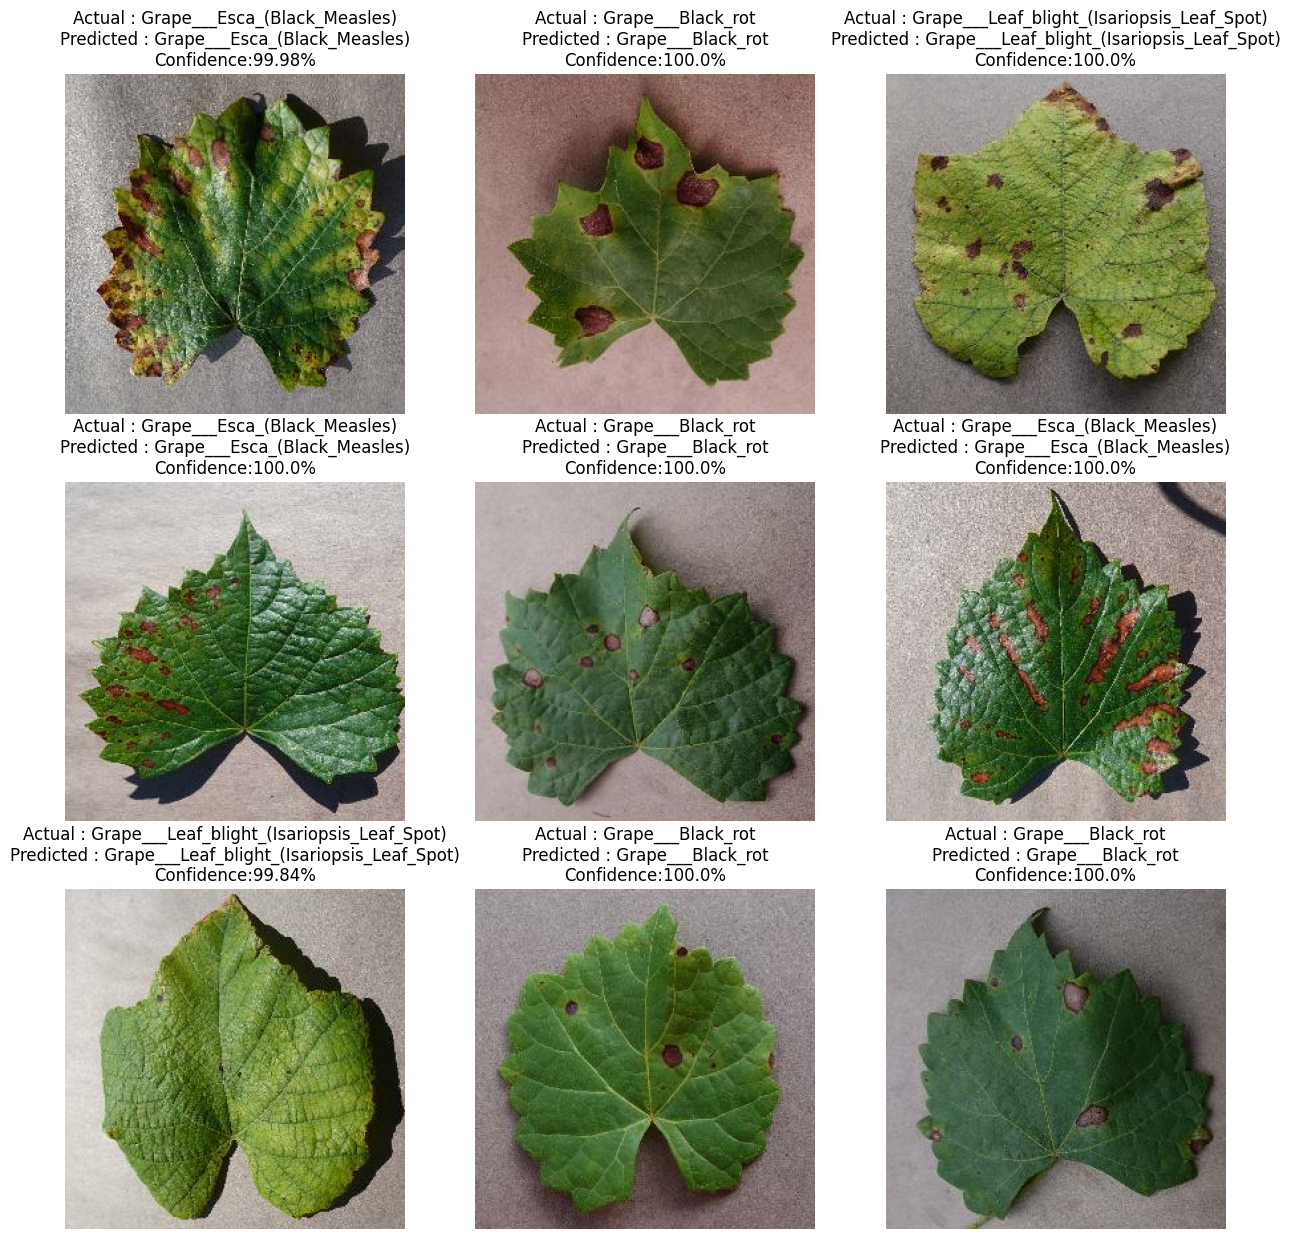

In [ ]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class , confidence = predict(model,images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual : {actual_class}\nPredicted : {predicted_class}\nConfidence:{confidence}%")

    plt.axis("off")

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/model//grape.h5")

In [ ]:
import os
model_version = max([int(i) for i in os.listdir("/models") + [0]]) + 1   #to get the next version of our model
model.save(f"/content/drive/MyDrive/Colab Notebooks/model/{model_version}")

In [ ]:
model_version=5
model.save("../grape.h5")
model.save(f"/content/drive/MyDrive/Colab Notebooks/model/{model_version}")
